In [180]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import os
import ta
import datetime as dt

In [182]:
df = pd.read_csv("data/binance_data.csv")

In [183]:
print(df.shape)
print(df.columns)

(1087772, 8)
Index(['Unnamed: 0', 'datetime', 'open', 'high', 'low', 'close', 'volume',
       'symbol'],
      dtype='object')


In [184]:
print(df['datetime'].min())

1641013200000.0


Figure out top ten cryptocurrencies by volume on average -

In [185]:
average_volume_ticker = df.groupby('symbol')['volume'].mean()
average_volume_ticker.reset_index()
average_volume_ticker.sort_values(ascending=False)[1:10]

symbol
SHIBBUSD    9.770912e+10
LUNABUSD    2.426371e+10
BTTCBUSD    1.902681e+10
XECBUSD     9.460844e+08
EPXBUSD     3.032042e+08
WINBUSD     1.611323e+08
MBLBUSD     6.375543e+07
USTCBUSD    6.018615e+07
AKROBUSD    5.861110e+07
Name: volume, dtype: float64

In [186]:
list_tickers = np.array(average_volume_ticker.index)
list_tickers

array(['1INCHBUSD', 'AAVEBUSD', 'ACABUSD', 'ACHBUSD', 'ACMBUSD',
       'ADABUSD', 'ADATUSD', 'ADXBUSD', 'AERGOBUSD', 'AGLDBUSD',
       'AKROBUSD', 'ALCXBUSD', 'ALGOBUSD', 'ALICEBUSD', 'ALPACABUSD',
       'ALPHABUSD', 'ALPINEBUSD', 'AMPBUSD', 'ANCBUSD', 'ANKRBUSD',
       'ANTBUSD', 'ANYBUSD', 'APEBUSD', 'API3BUSD', 'ARBUSD', 'ARPABUSD',
       'ASTRBUSD', 'ATABUSD', 'ATMBUSD', 'ATOMBUSD', 'AUCTIONBUSD',
       'AUDBUSD', 'AUDIOBUSD', 'AUTOBUSD', 'AVABUSD', 'AVAXBUSD',
       'AXSBUSD', 'BADGERBUSD', 'BAKEBUSD', 'BALBUSD', 'BANDBUSD',
       'BARBUSD', 'BATBUSD', 'BCHBUSD', 'BELBUSD', 'BETABUSD', 'BICOBUSD',
       'BIFIBUSD', 'BNBBUSD', 'BNBTUSD', 'BNTBUSD', 'BNXBUSD', 'BONDBUSD',
       'BSWBUSD', 'BTCBUSD', 'BTCSTBUSD', 'BTCTUSD', 'BTGBUSD', 'BTTBUSD',
       'BTTCBUSD', 'BTTTUSD', 'BURGERBUSD', 'C98BUSD', 'CAKEBUSD',
       'CELOBUSD', 'CELRBUSD', 'CFXBUSD', 'CHESSBUSD', 'CHRBUSD',
       'CHZBUSD', 'CITYBUSD', 'CKBBUSD', 'CLVBUSD', 'COCOSBUSD',
       'COMPBUSD', 'COSBUSD', 'COT

In [187]:
# Number of unique symbols
print(len(list_tickers))

318


In [188]:
# Number of unique symbols that are paired with USD
usd_list_tickers = [x for x in list_tickers if x.endswith("USD")]
usd_list_tickers
len(usd_list_tickers)

318

In [189]:
df_usd = df[df['symbol'].isin(usd_list_tickers)].copy() 


In [190]:
# top 10 most traded usd pairs
temp_df = df_usd.copy()
# Close is probably a good proxy for average price for stable coins over hourly intervals
close_x_volume = df_usd['close']*df_usd['volume']
temp_df['product'] = close_x_volume.values

In [191]:
average_volume_ticker = temp_df.groupby('symbol')['product'].mean()
high_volume_tickers = (average_volume_ticker.sort_values(ascending=False)[0:9].index)
print(high_volume_tickers)

Index(['BTCBUSD', 'ETHBUSD', 'LUNCBUSD', 'LUNABUSD', 'GMTBUSD', 'BNBBUSD',
       'SOLBUSD', 'APEBUSD', 'USDCBUSD'],
      dtype='object', name='symbol')


In [192]:
# convert to datetime
# convert to EST
df_usd['datetime'] = df['datetime']- 18000000
df_usd['datetime'] = pd.to_datetime(df_usd['datetime'], unit = 'ms')
df_usd.head()


,Unnamed: 0,datetime,open,high,low,close,volume,symbol
0,2022-01-01 00:00:00,2022-01-01 00:00:00,46709.76,47535.43,46680.58,47197.66,2.29999,BTCTUSD
1,2022-01-01 01:00:00,2022-01-01 01:00:00,47159.20,47314.60,46968.65,46968.65,2.24871,BTCTUSD
2,2022-01-01 02:00:00,2022-01-01 02:00:00,47016.82,47172.69,46919.68,47145.35,5.19031,BTCTUSD
3,2022-01-01 03:00:00,2022-01-01 03:00:00,47210.38,47295.53,47087.27,47106.93,3.71817,BTCTUSD
4,2022-01-01 04:00:00,2022-01-01 04:00:00,47095.05,47225.42,46946.06,47110.25,3.07901,BTCTUSD


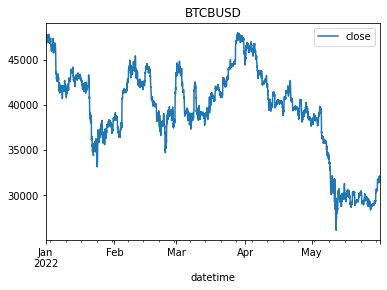

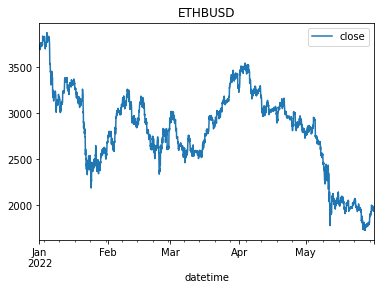

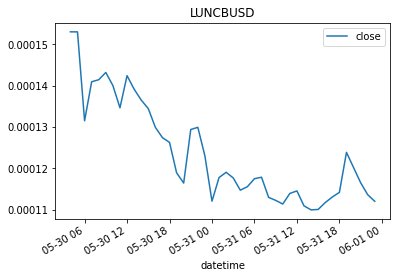

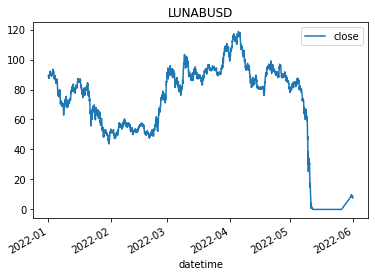

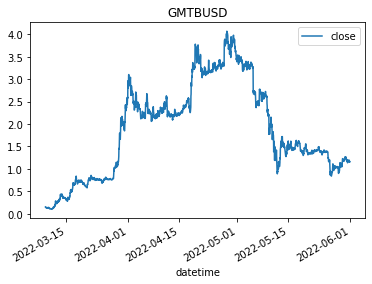

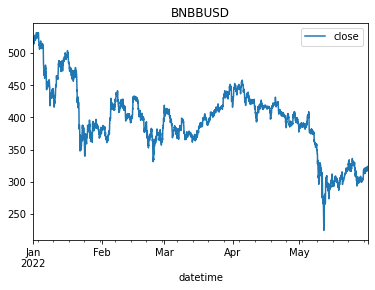

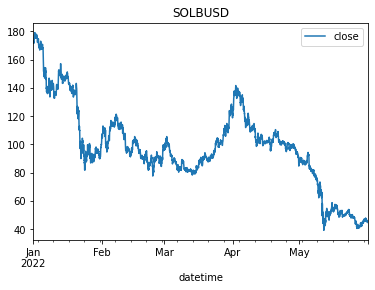

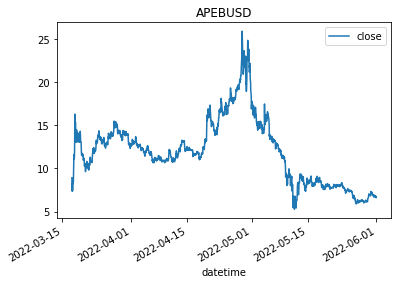

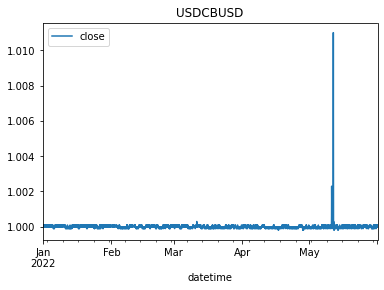

In [193]:
for ticker in high_volume_tickers:
    loop_df = df_usd[df_usd['symbol']==ticker] 
    loop_df.plot(x='datetime', y='close', title = ticker)
    

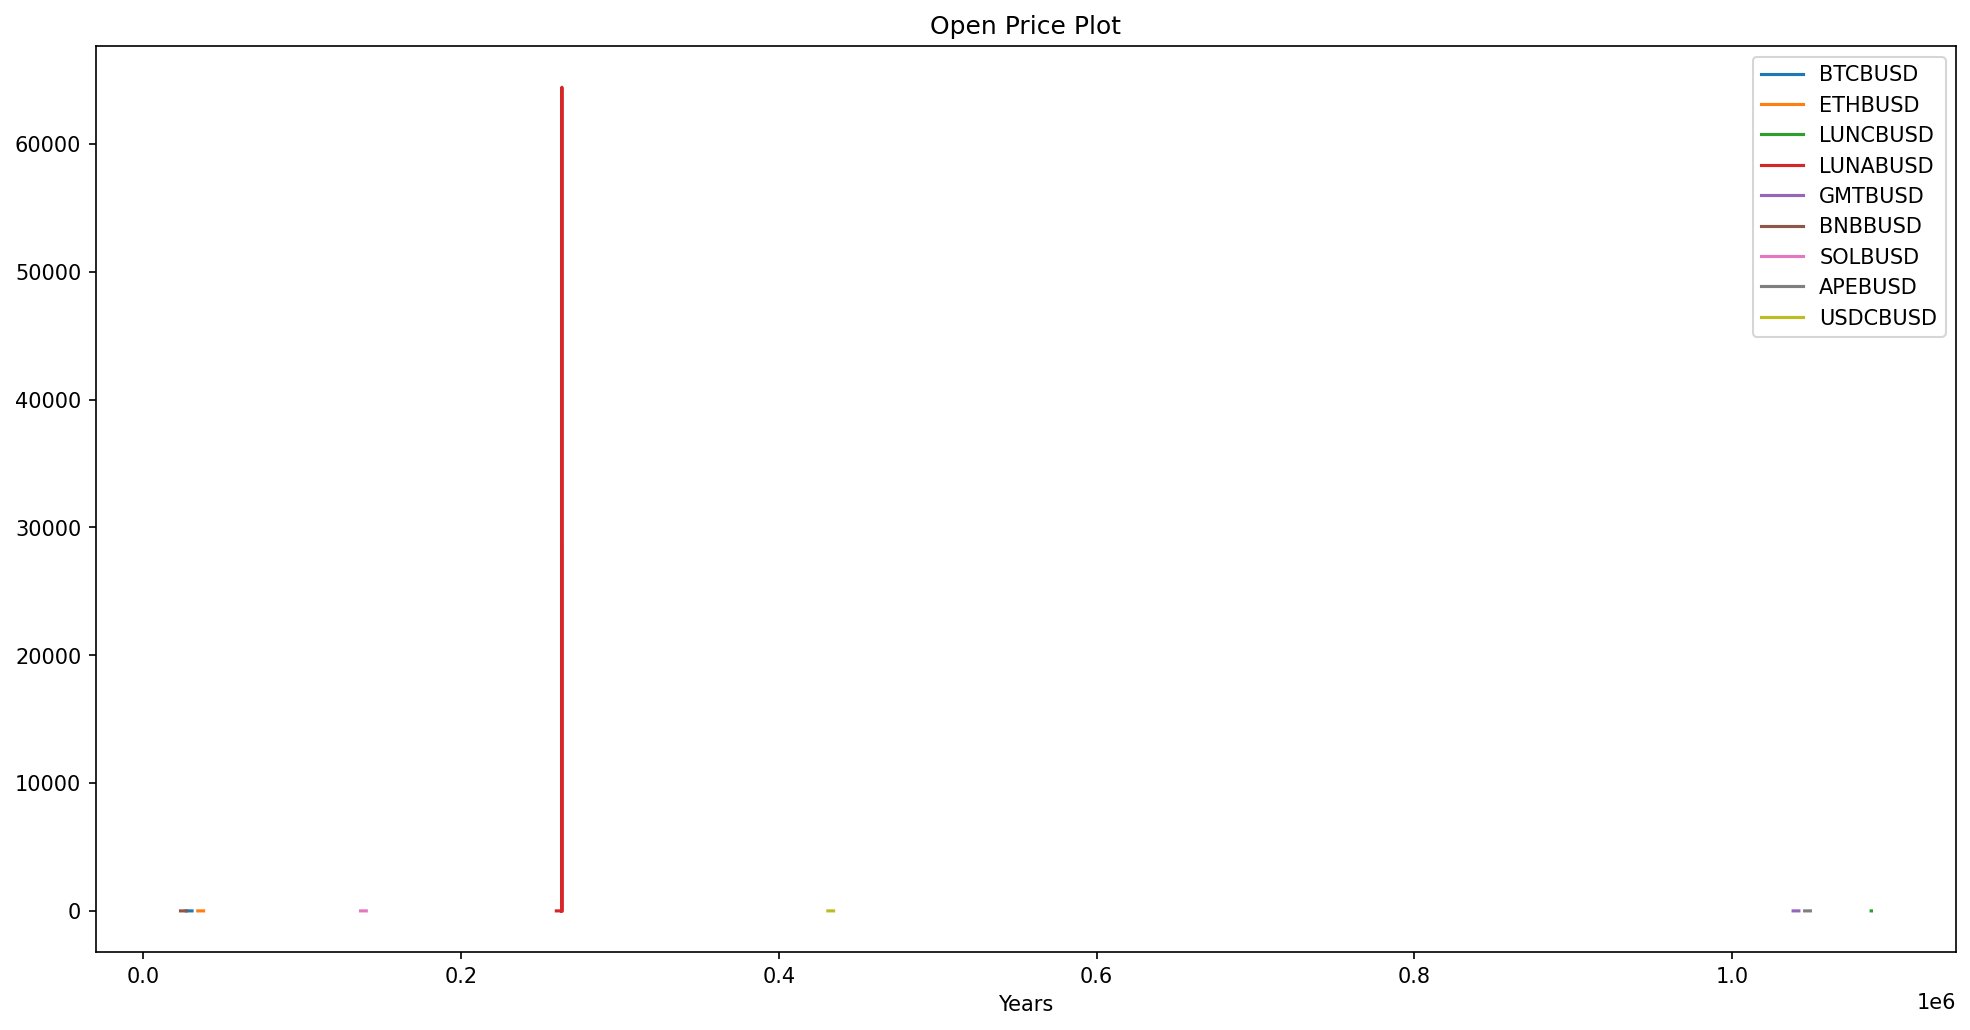

In [207]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
for ticker in high_volume_tickers:
    loop_df = df_usd[df_usd['symbol']==ticker].copy()
    loop_df['close']=loop_df['close'].pct_change()
    loop_df['close'].plot(label=ticker)
  
# adding title to the plot
plt.title('Open Price Plot')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

# TODO FIX THIS

In [204]:
# Look at rows per ticker
print("33 tickers with missing rows")
new_ticker_list = np.array((df_usd.groupby('symbol').size().sort_values()).index[33:])
print(new_ticker_list)


33 tickers with missing rows
['PERPBUSD' 'PEOPLEBUSD' 'PLABUSD' 'PHABUSD' 'PONDBUSD' 'POLYBUSD'
 'PAXGBUSD' 'POWRBUSD' 'PROMBUSD' 'PSGBUSD' 'PYRBUSD' 'QIBUSD' 'QNTBUSD'
 'QTUMBUSD' 'QUICKBUSD' 'RADBUSD' 'RAMPBUSD' 'RAREBUSD' 'POLSBUSD'
 'OXTBUSD' 'NULSBUSD' 'OOKIBUSD' 'MCBUSD' 'MBOXBUSD' 'MATICBUSD'
 'MASKBUSD' 'MANABUSD' 'LTOBUSD' 'MDTBUSD' 'LTCBUSD' 'LRCBUSD' 'LPTBUSD'
 'LOKABUSD' 'LITBUSD' 'LINKBUSD' 'LINABUSD' 'LSKBUSD' 'ORNBUSD' 'MDXBUSD'
 'MIRBUSD' 'ONTBUSD' 'ONEBUSD' 'OMGBUSD' 'OMBUSD' 'OGNBUSD' 'OCEANBUSD'
 'MINABUSD' 'NMRBUSD' 'NEARBUSD' 'MULTIBUSD' 'MTLBUSD' 'MOVRBUSD'
 'MLNBUSD' 'MKRBUSD' 'NEOBUSD' 'RAYBUSD' '1INCHBUSD' 'RENBUSD' 'VOXELBUSD'
 'VIDTBUSD' 'VETBUSD' 'UTKBUSD' 'USDPBUSD' 'USDCBUSD' 'UNIBUSD' 'UNFIBUSD'
 'UMABUSD' 'UFTBUSD' 'TWTBUSD' 'TVKBUSD' 'TUSDBUSD' 'TRXTUSD' 'TRXBUSD'
 'WAVESBUSD' 'TROYBUSD' 'WAXPBUSD' 'WINGBUSD' 'ZENBUSD' 'ZECBUSD'
 'YGGBUSD' 'YFIBUSD' 'XVSBUSD' 'XVGBUSD' 'XTZBUSD' 'XRPTUSD' 'XRPBUSD'
 'XNOBUSD' 'XMRBUSD' 'XLMBUSD' 'XECBUSD' 'WRXBUSD' 'WOO

In [205]:
df_usd.isna().sum().sum()
# No NaN's

0

In [206]:
# Create data frame with only close
close_df = pd.DataFrame(columns = new_ticker_list)
for ticker in new_ticker_list:
    ticker_df = df_usd[df_usd['symbol'] == ticker].copy()
    close_df[ticker] = np.array(ticker_df['close'])
print(close_df.head())


   PERPBUSD  PEOPLEBUSD  PLABUSD  PHABUSD  PONDBUSD  POLYBUSD  PAXGBUSD  \
0      8.83      0.1245    1.439   0.4332   0.06544    0.4856    1945.0   
1      8.80      0.1228    1.434   0.4333   0.06523    0.4843    1940.0   
2      8.84      0.1246    1.430   0.4318   0.06546    0.4856    1941.0   
3      8.83      0.1236    1.440   0.4308   0.06516    0.4870    1946.0   
4      8.86      0.1225    1.432   0.4263   0.06527    0.4832    1943.0   

   POWRBUSD  PROMBUSD  PSGBUSD  ...  EURBUSD  ETHBUSD  ETCBUSD  ERNBUSD  \
0    0.4219     12.19    15.33  ...    1.136  3735.87    34.40    8.968   
1    0.4203     12.23    15.29  ...    1.135  3712.57    34.29    9.007   
2    0.4191     12.26    15.27  ...    1.136  3715.76    34.44    9.178   
3    0.4191     12.23    15.26  ...    1.136  3721.84    34.43    9.150   
4    0.4193     12.22    15.21  ...    1.135  3718.75    34.35    9.143   

   EOSBUSD  ENSBUSD  ENJBUSD  ELFBUSD  ETHTUSD  ZRXBUSD  
0    3.082    39.71    2.603   0.3779  3

In [155]:
print(len(pd.unique(df_usd['datetime'])))

3624


In [175]:
print(df_usd.shape)
print(df.shape)
df_btc = df_usd[df_usd['symbol'] == "BTCBUSD"]
print(df_btc.head())

(155249, 7)
(785019, 7)
                  datetime      open      high       low     close     volume  \
149415 2022-01-01 00:00:00  46710.73  47552.69  46679.66  47191.72  446.55055   
149416 2022-01-01 01:00:00  47196.74  47320.00  46948.50  46983.38  183.09717   
149417 2022-01-01 02:00:00  46983.38  47249.14  46896.35  47202.17  172.91848   
149418 2022-01-01 03:00:00  47201.75  47357.08  47082.24  47122.84  151.74147   
149419 2022-01-01 04:00:00  47122.85  47206.35  46942.76  47140.29  153.30923   

         symbol  
149415  BTCBUSD  
149416  BTCBUSD  
149417  BTCBUSD  
149418  BTCBUSD  
149419  BTCBUSD  


In [1]:
start = (int(dt.datetime(2022, 1, 1).timestamp()*1000))
end = (int(dt.datetime(2022, 6, 1).timestamp()*1000))
hours = (end - start) / (3600 * 1000)
hours


NameError: name 'dt' is not defined